### Model that predicts future stock prices based on previously provided data

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
stock = yf.Ticker("AAPL")
data = stock.history(period="5y") #just turning into dataframe

In [3]:
# thori si data cleaning
data = data[["Open", "High", "Low", "Close", "Volume"]]

data["Next_Close"] = data["Close"].shift(-1) # creating a new col
data = data.dropna() # last row of the new col will have no value. So better hai k drop kr dein

### Testing and training data

In [4]:
X = data[["Open", "High", "Low", "Volume"]]
Y = data["Next_Close"]

split_index = int(len(X) * 0.8) # 80% data =training k liye, 20% testing k liye

X_train = X[:split_index]
X_test = X[split_index:]

Y_train = Y[:split_index]
Y_test = Y[split_index:]

### Creating and working with out model 

In [7]:
model = LinearRegression()
model.fit(X_train, Y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(Y_test, predictions)
r2 = r2_score(Y_test, predictions)

print("Mean Squared Error:", mse) # just checking k humara model kitna acha perform kr rha hai
print("R2 Score:", r2) # i hope iss ki value achi ho :)

Mean Squared Error: 22.250555276421988
R2 Score: 0.9733671133515055


### Plotting the data

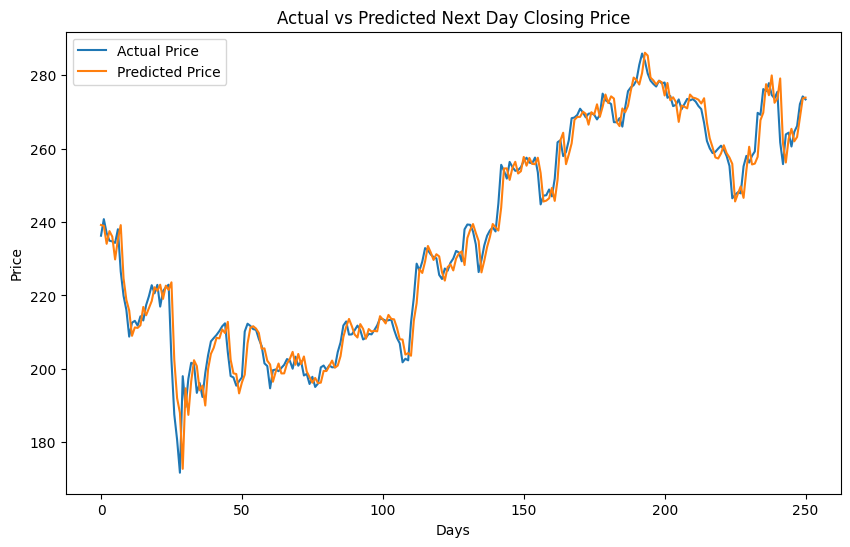

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(Y_test.values, label="Actual Price")
plt.plot(predictions, label="Predicted Price")
plt.legend()
plt.title("Actual vs Predicted Next Day Closing Price")
plt.xlabel("Days")
plt.ylabel("Price")
plt.show()